In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Ask A Manager Salary Survey 2021 (Responses).xlsx')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28153 entries, 0 to 28152
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                --------------  -----         
 0   Timestamp                                                                                                                                                                                                                             28153 non-null  datetime64[ns]
 1   How old are you?                                                                        

In [3]:
print(df.columns)

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

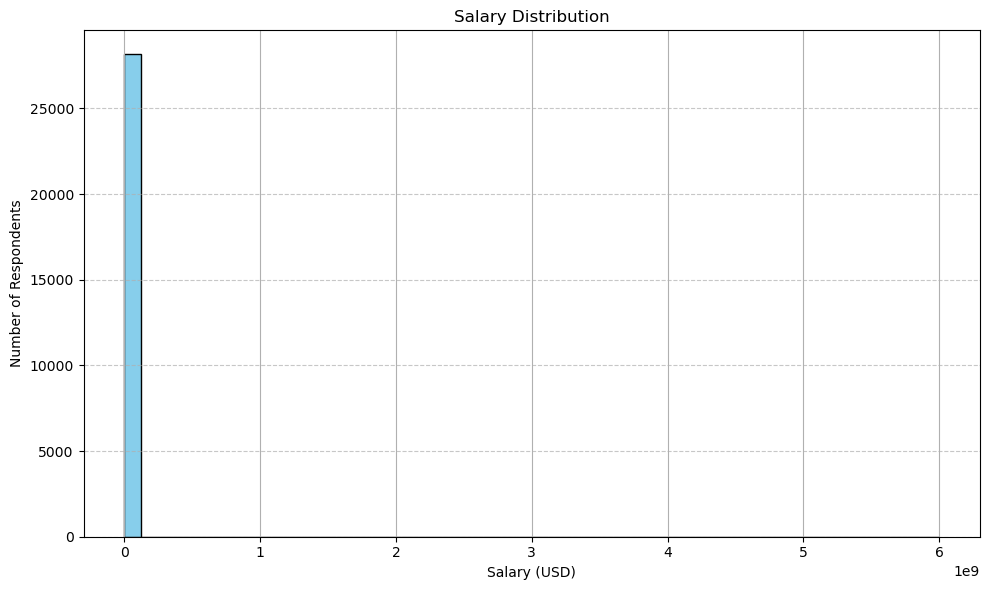

In [4]:
plt.figure(figsize=(10, 6))
df["What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)"].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
df = df.drop(columns=['Timestamp','If your job title needs additional context, please clarify here:','If "Other," please indicate the currency here: ','If your income needs additional context, please provide it here:'])

In [6]:
df = df.rename(columns={
    'How old are you?': "Age",
    'What industry do you work in?': 'Industry',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'Additional Income',
    'Please indicate the currency':'Currency',
    'What country do you work in?':'Country',
    "If you're in the U.S., what state do you work in?":'State',
    'What city do you work in?':'City',
    'How many years of professional work experience do you have overall?':'Overall Experience',
    'How many years of professional work experience do you have in your field?':'Field Experience',
    'What is your highest level of education completed?':'Highest Education',
    'What is your gender?':'Gender',
    'What is your race? (Choose all that apply.)':'Race'})

In [7]:
print(df.columns)

Index(['Age', 'Industry', 'Job title', 'Salary', 'Additional Income',
       'Currency', 'Country', 'State', 'City', 'Overall Experience',
       'Field Experience', 'Highest Education', 'Gender', 'Race'],
      dtype='object')


In [8]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Additional Income'] = pd.to_numeric(df['Additional Income'], errors='coerce')

In [9]:
if 'Country' in df.columns:
    df['Country'] = df['Country'].fillna('Unknown')

In [10]:
df = df.drop_duplicates()

In [11]:
for col in df.columns:
    print(f"\n--- Value counts for: {col} ---")
    print(df[col].value_counts(dropna=False))


--- Value counts for: Age ---
Age
25-34         12612
35-44          9865
45-54          3179
18-24          1243
55-64           987
65 or over       95
under 18         14
Name: count, dtype: int64

--- Value counts for: Industry ---
Industry
Computing or Tech                          4693
Education (Higher Education)               2462
Nonprofits                                 2405
Health care                                1891
Government and Public Administration       1885
                                           ... 
Manufacturing : corporate admin support       1
Real Estate Investment Support                1
Government relations                          1
Household Services                            1
ABA                                           1
Name: count, Length: 1222, dtype: int64

--- Value counts for: Job title ---
Job title
Software Engineer                      286
Project Manager                        229
Senior Software Engineer               196
Director  

In [12]:
df = df[~df['State'].str.contains(',', na=False)]
df = df[~df['City'].str.contains(',', na=False)]

In [13]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

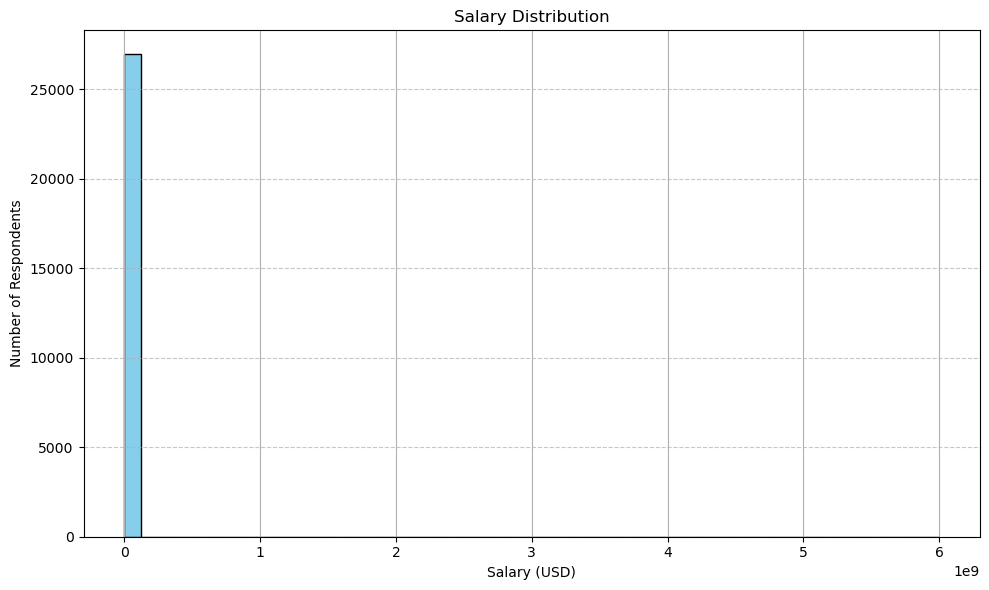

In [14]:
plt.figure(figsize=(10, 6))
df['Salary'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Unsorted Values

In [16]:
counts = df['Overall Experience'].value_counts().sort_index()

counts_df = counts.reset_index()
counts_df.columns = ['Overall Experience', 'count']

print(counts_df)

  Overall Experience  count
0     1 year or less    529
1      11 - 20 years   9239
2        2 - 4 years   2903
3      21 - 30 years   3495
4      31 - 40 years    839
5   41 years or more    123
6          5-7 years   4671
7       8 - 10 years   5145


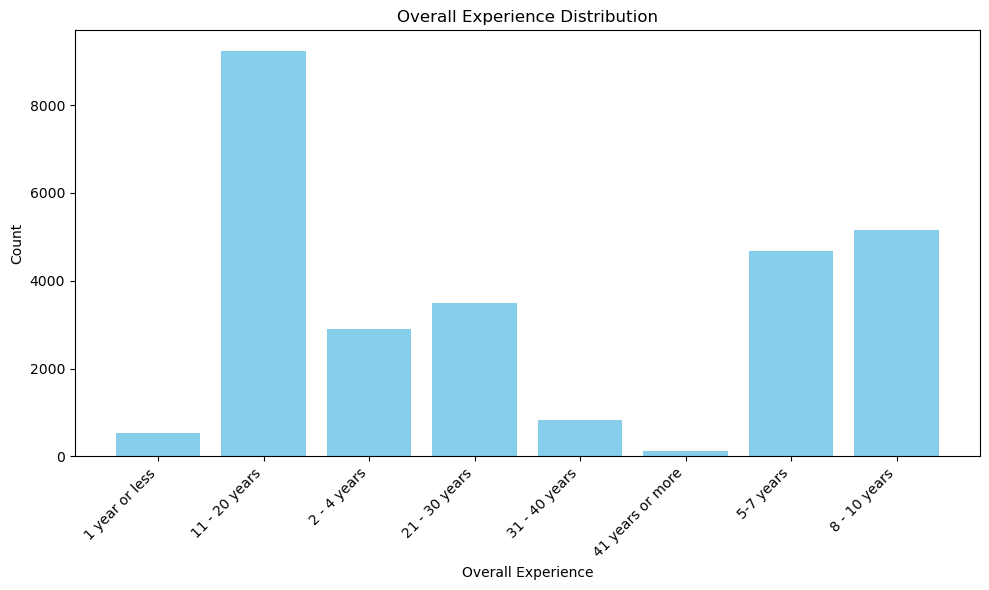

In [17]:
plt.figure(figsize=(10,6))
plt.bar(counts_df['Overall Experience'], counts_df['count'], color='skyblue')
plt.xlabel('Overall Experience')
plt.ylabel('Count')
plt.title('Overall Experience Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Sorted by Ascending Value

In [19]:
counts_df = counts_df.sort_values(by='count', ascending=False)

print(counts_df)

  Overall Experience  count
1      11 - 20 years   9239
7       8 - 10 years   5145
6          5-7 years   4671
3      21 - 30 years   3495
2        2 - 4 years   2903
4      31 - 40 years    839
0     1 year or less    529
5   41 years or more    123


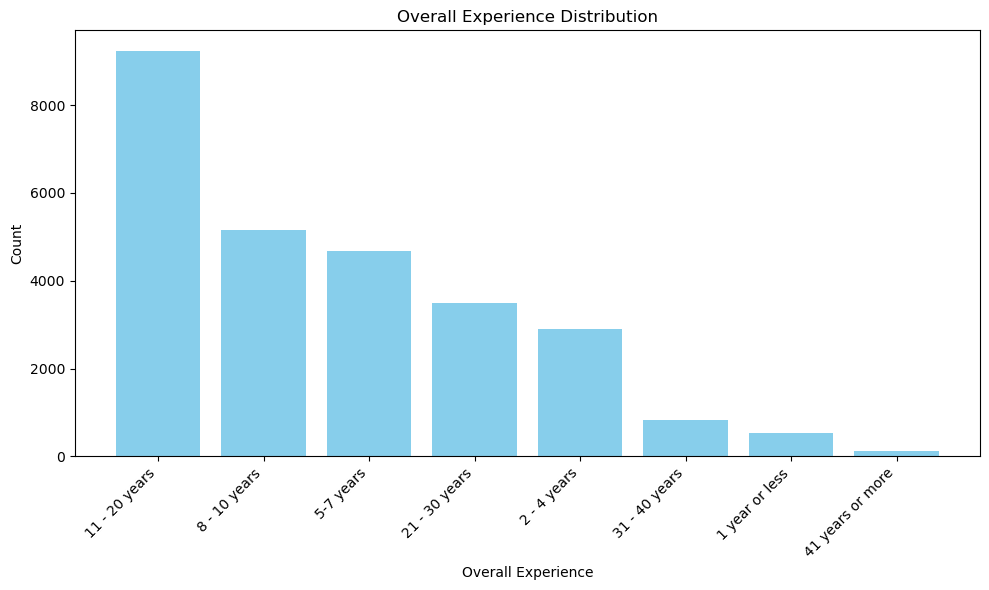

In [20]:
plt.figure(figsize=(10,6))
plt.bar(counts_df['Overall Experience'], counts_df['count'], color='skyblue')
plt.xlabel('Overall Experience')
plt.ylabel('Count')
plt.title('Overall Experience Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

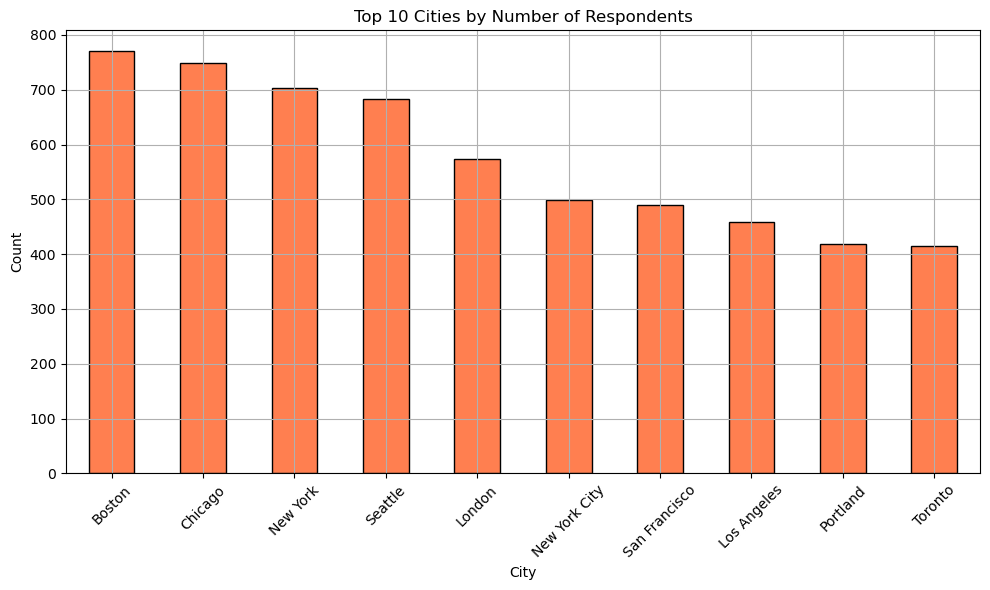

In [21]:
city_counts = df['City'].value_counts().head(10)

city_counts.plot(kind='bar', color='coral', edgecolor='black', figsize=(10,6), rot=45, grid=True)
plt.title('Top 10 Cities by Number of Respondents')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()